In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

In [32]:
drSim = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/5_new_drug/new_predict/1_drug_drug_combined_sim_mat.tsv", index_col=0)

In [33]:
diSim = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/6_new_disease/new_predict/1_disease_disease_combined_sim_mat.tsv", index_col=0)

In [56]:
asso = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/1_gold_learning_asso.tsv")

In [42]:
drSim.head(1)

,DB00114,DB00126,DB00136,DB00153,DB00162,DB00165,DB00175,DB00176,DB00177,DB00178,...,DB01576,DB01577,DB01590,DB01623,DB02546,DB03904,DB04272,DB04844,DB04861,DB09026
DB00114,1.0,0.938622,0.903264,0.925363,0.936529,0.909315,0.894658,0.879588,0.917654,0.889333,...,0.901224,0.933101,0.887883,0.916233,0.888166,0.908213,0.931833,0.898121,0.886401,0.905366


In [53]:
dr_id = drSim.columns.values.tolist()
di_id = diSim.columns.values.tolist()

In [111]:
pos = asso[asso.association == 1]

In [112]:
# drug-disease similarity, normalize
di_dr_mat = pd.DataFrame(columns = dr_id, index= di_id) #di에 대한 dr의 distance보기
cnt = 0 
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
for i in dr_id:
    other_drugs_sim = drSim[drSim.index != i][i] # 검사할 drug를 제외한 다른 drug들
    for j in di_id:
        target_disease = pos[(pos.disease_id == int(j))]
        other_drugs_di_sim = other_drugs_sim.filter(items = target_disease['drug_id'].tolist())
        sum_selected_drug = other_drugs_di_sim.sum() # association이 있는 것들의 합
        sum_all_drug = other_drugs_sim.sum() # similarity의 전체 합
        norm = sum_selected_drug / sum_all_drug #normalize한 값
        di_dr_mat[i].ix[j] = norm
    cnt = cnt + 1
    if cnt % 100 == 0
        print 'cnt == {} : '.format(cnt) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print 'end : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    

start : 2017-04-23 21:47:44
cnt == 100 : 2017-04-23 21:48:27
cnt == 200 : 2017-04-23 21:49:08
cnt == 300 : 2017-04-23 21:49:47
cnt == 400 : 2017-04-23 21:50:27
end : 2017-04-23 21:50:41


In [119]:
di_dr_mat.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/2_1_drug_disease_sim_matrix.tsv", sep='\t')

In [115]:
#disease-drug similarity #normalize 한 버전
dr_di_mat = pd.DataFrame(columns = dr_id, index= di_id) #dr에 대한 di의 distance보기
cnt = 0 
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
for i in di_id:
    other_diseases_sim = diSim[diSim.index != int(i)][i] # 검사할 disease를 제외한 다른 disease들
    for j in dr_id:
        target_drugs = pos[(pos.drug_id ==j)] # 검사할 drug
        other_diseases_dr_sim = other_diseases_sim.filter(items = target_drugs['disease_id'].tolist())
        sum_selected_disease = other_diseases_dr_sim.sum()
        sum_all_disease = other_diseases_sim.sum()
        norm = sum_selected_disease / sum_all_disease
        dr_di_mat[j].ix[i] = norm   
    cnt = cnt + 1
    if cnt % 100 == 0:
        print 'cnt == {} : '.format(cnt) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print 'end : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')

start : 2017-04-23 21:52:13
cnt == 100 : 2017-04-23 21:53:24
cnt == 200 : 2017-04-23 21:54:34
end : 2017-04-23 21:54:56


In [120]:
dr_di_mat.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/2_2_disease_drug_sim_matrix.tsv", sep='\t')

In [117]:
bef_distance = -(di_dr_mat+dr_di_mat)
distance_mat = pd.DataFrame(columns = bef_distance.columns.values, index = bef_distance.index.values)
cnt = 0 
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
for i in bef_distance.columns.values:
    for j in bef_distance.index.values:
        a = bef_distance[i].ix[j]
        distance = np.exp(a)
        distance_mat[i].ix[j] = distance
    cnt = cnt + 1
    if cnt % 100 == 0:
        print 'cnt == {} : '.format(cnt) + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print 'end : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')

start : 2017-04-23 21:55:23
cnt == 100 : 2017-04-23 21:55:31
cnt == 200 : 2017-04-23 21:55:40
cnt == 300 : 2017-04-23 21:55:48
cnt == 400 : 2017-04-23 21:55:56
end : 2017-04-23 21:55:59


In [118]:
print di_dr_mat.min().min() #drisease-drug sim의 최소값
print di_dr_mat.max().max() #disease-drug sim의 최대값
print dr_di_mat.min().min() #drug-disease sim의 최소값
print dr_di_mat.max().max() #drug-disease sim의 최소값
print (di_dr_mat + dr_di_mat).min().min() #위 두 결과를 더한 matrix의 최소값 (sim의 합의 최소값)
print (di_dr_mat + dr_di_mat).max().max() #위 두 결과를 더한 matrix의 최대값 (sim의 합의 최대값)
print bef_distance.min().min() #  - (sim의 합의 최대값)--> 최소값 --> 이 값을 exp에 넣으면 거리는 최소가 됨.
print bef_distance.max().max() #  - (sim의 합의 최소값)--> 최대값 --> 이 값을 exp에 넣으면 거리는 최대가 됨.
print np.exp(bef_distance.min().min()) #거리의 최소값 = 가까운 거리
print np.exp(bef_distance.max().max()) # 거리의 최대값 = 먼 거리

0.0
0.179212877729
0.0
0.0824104003554
0.0
0.258910218901
-0.258910218901
-0.0
0.771892321274
1.0


In [122]:
distance_mat.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/2_3_drug_disease_norm_distance.tsv", sep='\t')

In [124]:
# Similarity histogram
summed_sim = list()
for index, row in (di_dr_mat + dr_di_mat).iterrows():
    for l in row:
        summed_sim.append(l)
print len(summed_sim)

val = list()
for index, row in distance_mat.iterrows():
    for k in row:
        val.append(k)
print len(val)

101122
101122


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


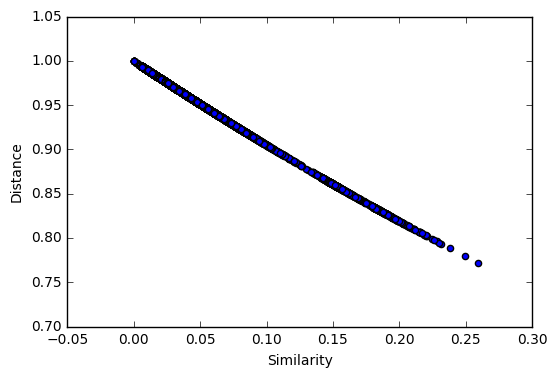

In [125]:
# Similarity 분포를 보려고 (2017.4.18.)
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
%matplotlib inline
#num_bins = 30
#plt.hist(summed_sim, num_bins)
plt.scatter(summed_sim, val) ## sim이 낮을 수록 거리가 멀다.
plt.xlabel("Similarity")
plt.ylabel("Distance")
#plt.xlim(0,20)
#plt.ylim(0, 0.2)
#plt.ylim(0.10, 0.14)

In [ ]:
# TN 찾기 (local 고려, pos 정보 없앰. indep도.) 

In [127]:
distance_mat = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/2_3_drug_disease_norm_distance.tsv", sep='\t', index_col=0)

In [235]:
# di당 거리가 먼 dr을 일정비율로 뽑는다.
li_tn_di = list()
for index, row in distance_mat.iterrows():
    #idx = int(len(row)*0.1)
    #idx = 29 #positive와 TN 비율을 1:10으로 할때
    #idx = 43 # poisitive : TN = 1: 15
    #idx = 58 # poisitive : TN = 1: 20
    #idx = 87 # poisitive : TN = 1: 30
    #idx = 15 # poisitive : TN = 1: 5
    idx = 4 # poisitive : TN = 1: 1
    filtered = row.sort_values(ascending=False)[:idx]
    li_tn_di.append([index, filtered.index.tolist()])

df_tn_di = pd.DataFrame()
for i in li_tn_di:
    for j in i[1]:
        temp_df = pd.DataFrame(data=[[i[0], j]], columns = ['disease_id', 'drug_id'])
        df_tn_di= df_tn_di.append(temp_df)

In [228]:
# dr당 거리가 먼 di을 일정비율로 뽑는다.
li_tn_dr = list()
for column in distance_mat:
    #idx = int(len(distance_mat2[column])*0.1)
    #idx = 15 #positive와 TN 비율을 1:10으로 할때
    #idx = 23 # poisitive : TN = 1: 15
    #idx = 31 # poisitive : TN = 1: 20
    #idx = 46 # poisitive : TN = 1: 30
    #idx = 8 # poisitive : TN = 1: 5
    idx = 2 # poisitive : TN = 1: 1
    filtered = distance_mat[column].sort_values(ascending=False)[:idx]
    li_tn_dr.append([column, filtered.index.tolist()])

df_tn_dr = pd.DataFrame()
for i in li_tn_dr:
    for j in i[1]:
        temp_df = pd.DataFrame(data=[[j, i[0]]], columns = ['disease_id', 'drug_id'])
        df_tn_dr= df_tn_dr.append(temp_df)

In [236]:
concatenated = pd.concat([df_tn_di, df_tn_dr]).drop_duplicates()[['drug_id', 'disease_id']]
print len(concatenated)
#concatenated.index = range(len(concatenated))
concatenated.set_index(['drug_id', 'disease_id'], inplace=True)
concatenated.head(1)

1750


,
drug_id,disease_id
DB00193,102300


In [237]:
print "total :{}, drug : {}, disease : {}".format(len(pos),
                                                  len(pos.index.get_level_values(0).drop_duplicates()),
                                                  len(pos.index.get_level_values(1).drop_duplicates()))
#pos.set_index(['drug_id', 'disease_id'], inplace=True)
pos.head(1)

total :1330, drug : 434, disease : 233


,,association
drug_id,disease_id,
DB00659,103780,1


In [238]:
# 구한 TN이 positive associaion과 겹치는게 있는지 체크 
tn_pos = concatenated[~concatenated.index.isin(pos.index.tolist())]
print len(tn_pos) # tn - pos
tn_pos.head(1)

1417


,
drug_id,disease_id
DB01356,102300


In [135]:
# 구한 TN이 indep과 겹치는게 있는지 체크
#indep = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/2_2_indep_descriptor.tsv")
path = "/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/1_feature_based-Systematic/4_PREDICT_dataset_ver2/"
indep = pd.read_table(path + "2_indep_descriptor.tsv", index_col = [0,1])

In [239]:
tn_pos_indep = tn_pos[~tn_pos.index.isin(indep.index.tolist())]
print len(tn_pos_indep) # tn - pos - indep
tn_pos_indep.head(1)

1414


,
drug_id,disease_id
DB01356,102300


In [240]:
#tn_pos_indep.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_1_tn_local_norm_1_10.tsv", sep='\t')
#tn_pos_indep.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_2_tn_local_norm_1_20.tsv", sep='\t')
#tn_pos_indep.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_3_tn_local_norm_1_15.tsv", sep='\t')
#tn_pos_indep.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_4_tn_local_norm_1_5.tsv", sep='\t')
tn_pos_indep.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_5_tn_local_norm_1_1.tsv", sep='\t')

In [ ]:
# negative descriptor 만들기 -local

In [241]:
#concatenated = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_1_tn_local_norm_1_10.tsv", sep='\t')
#concatenated = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_2_tn_local_norm_1_20.tsv", sep='\t')
#concatenated = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_3_tn_local_norm_1_15.tsv", sep='\t')
#concatenated = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_4_tn_local_norm_1_5.tsv", sep='\t')
concatenated = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_5_tn_local_norm_1_1.tsv", sep='\t')

In [242]:
print len(concatenated)
print len(concatenated.drop_duplicates())
concatenated.head(1)

1414
1414


,drug_id,disease_id
0,DB01356,102300


In [148]:
path = "/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/2_similarity_based-PREDICT/"
desc = pd.read_table(path + "2_3_gold_descriptor.tsv", index_col = [0,1])

In [243]:
tns = [tuple(x) for x in concatenated[['drug_id', 'disease_id']].values]

In [244]:
df_tn_desc = desc.filter(items = tns, axis=0)
print len(df_tn_desc)
df_tn_desc.head(1)

1414


,,association,drStr_diGe,drStr_diPhe,drPhe_diGe,drPhe_diPhe
drug_id,disease_id,,,,,
DB01356,102300,0,0.957341,0.408694,0.975566,0.966915


In [245]:
desc_pos = desc[desc.association ==1]
frames = [desc_pos, df_tn_desc]
whole_desc = pd.concat(frames)

In [246]:
print len(desc_pos)
print len(df_tn_desc)
print len(whole_desc)
whole_desc.head(1)

1330
1414
2744


,,association,drStr_diGe,drStr_diPhe,drPhe_diGe,drPhe_diPhe
drug_id,disease_id,,,,,
DB00114,239350,1,0.80403,0.80403,0.962981,0.962981


In [247]:
print len(whole_desc.index.get_level_values(0).drop_duplicates())
print len(whole_desc.index.get_level_values(1).drop_duplicates())

434
233


In [249]:
path = "/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/2_similarity_based-PREDICT/"
#whole_desc.to_csv(path + "4_tn_local_norm_1_10_descriptor.tsv", sep='\t')
#whole_desc.to_csv(path + "4_2_tn_local_norm_1_20_descriptor.tsv", sep='\t')
#whole_desc.to_csv(path + "4_3_tn_local_norm_1_15_descriptor.tsv", sep='\t')
#whole_desc.to_csv(path + "4_4_tn_local_norm_1_5_descriptor.tsv", sep='\t')
whole_desc.to_csv(path + "4_5_tn_local_norm_1_1_descriptor.tsv", sep='\t')

In [ ]:
# 4.24. noTN 구하기

In [252]:
path = "/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/2_similarity_based-PREDICT/"
desc = pd.read_table(path + "2_3_gold_descriptor.tsv", index_col = [0,1])
indep = pd.read_table(path + "3_2_indep_descriptor.tsv", index_col = [0,1])
tn = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/new_predict/4_5_tn_local_norm_1_1.tsv", index_col = [0,1])

In [254]:
print len(desc)
print len(tn)

99493
1414


In [257]:
neg = desc[desc.association == 0]
print len(neg)
neg.head(1)

98163


,,association,drStr_diGe,drStr_diPhe,drPhe_diGe,drPhe_diPhe
drug_id,disease_id,,,,,
DB00114,102300,0,0.983534,0.429415,0.983534,0.943927


In [258]:
# neg - tn - indep
neg_tn = neg[~neg.index.isin(tn.index.values.tolist())]
neg_tn_indep = neg_tn[~neg_tn.index.isin(indep.index.values.tolist())]
print len(neg_tn)
print len(indep)
print len(neg_tn_indep)  # 이미 desc 만들 때, indep과 중복을 제거한 후라서 수의 변화가 없다.

96749
2399
96749


In [262]:
Opath = "/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/2_similarity_based-PREDICT/"
neg_tn_indep.to_csv(Opath + "4_5_2_noTn_only_local_norm_descriptor.tsv", sep='\t')

In [261]:
pos = desc[desc.association == 1]
neg_tn_indep_pos = pd.concat([pos, neg_tn_indep])

In [263]:
neg_tn_indep_pos.to_csv(Opath + "4_5_3_noTn_1_1_local_norm_descriptor.tsv", sep='\t')